In this notebook, I will perform a test run first based on the baboon data followed by a test run on a primate-diversity species (probably Gorilla).

In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

First the baboons.

In [2]:
meta_data_samples_sci = pd.read_csv("/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/data/Papio_metadata_with_clustering_sci.txt", sep =" ")

In [3]:
meta_data_samples_sci.loc[meta_data_samples_sci.Origin == "Ruaha, Tanzania"]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin
24,PD_0213,07RUF1090716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",F,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,24,"Cynocephalus, Central Tanzania"
25,PD_0214,09RUF1100716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",F,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,25,"Cynocephalus, Central Tanzania"
26,PD_0215,13RUM1130716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",M,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,26,"Cynocephalus, Central Tanzania"
27,PD_0216,16RUF8140716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",F,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,27,"Cynocephalus, Central Tanzania"
28,PD_0217,17RUM5140716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",M,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,28,"Cynocephalus, Central Tanzania"
87,PD_0503,44 / 14RUF5130716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",F,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,87,"Cynocephalus, Central Tanzania"


Mask check

In [4]:
mask_check = pd.read_csv("/home/eriks/baboondiversity/data/callability_panu3_26_04_2021/chrXsorted.bed.gz",
                         sep="\t", names=["chrom", "start", "end"])

In [5]:
(mask_check.end-mask_check.start).sum()/mask_check.end.max()
# The bed intervals covers 8.5 % of the chrom, is a negative mask

0.08532842450670947

Copied approach from Trevor Cousins tutorial.

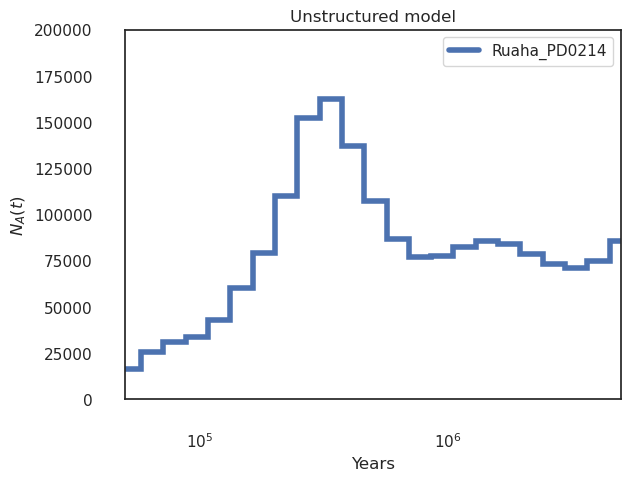

In [6]:
mu = 0.45e-08
gen = 11
final_params_file = "/home/eriks/primatediversity/people/erik/Diversity_Selection_Primates/steps/cobraa/PD_0214final_parameters.txt"
final_params = np.loadtxt(final_params_file)
time_array = list(final_params[:,1])
time_array.insert(0,0)
time_array = np.array(time_array)
plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label="Ruaha_PD0214",linewidth=4,linestyle="solid",baseline=None)
plt.xlim(5e+04,5e+06)
plt.ylim(0,20e+04)
plt.xscale('log')
plt.ylabel('$N_A(t)$')
plt.xlabel('Years')
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
plt.legend(ncol=2)
plt.title('Unstructured model')
plt.show()

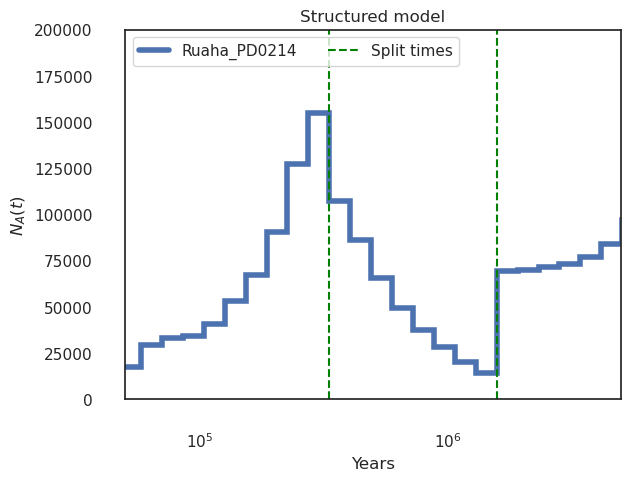

In [7]:
ts=10
te=18
final_params_file = "/home/eriks/primatediversity/people/erik/Diversity_Selection_Primates/steps/cobraa/PD_0214_D32_ts10_te18_final_parameters.txt"
final_params = np.loadtxt(final_params_file)
time_array = list(final_params[:,1])
time_array.insert(0,0)
time_array = np.array(time_array)
plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label="Ruaha_PD0214",linewidth=4,linestyle="solid",baseline=None) # plot population A inferred size
#     plt.stairs(edges=(time_array[ts:te+1]/mu)*gen,values=(1/final_params[ts:te,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3) # plot population B inferred size 
plt.axvline((time_array[ts]/mu)*gen,color="green",linestyle="dashed")  
plt.axvline((time_array[te]/mu)*gen,label="Split times",color="green",linestyle="dashed")    

plt.xlim(5e+04,5e+06)
plt.ylim(0,20e+04)
plt.xscale('log')
plt.ylabel('$N_A(t)$')
plt.xlabel('Years')
plt.title('Structured model')
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
plt.legend(ncol=2)
plt.show()

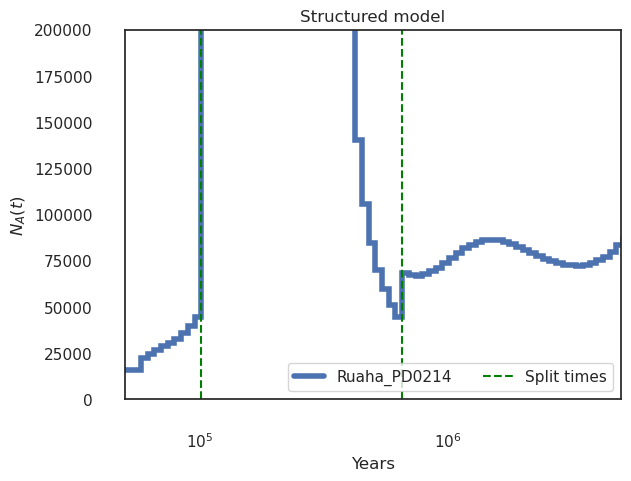

In [8]:
ts=10
te=40
final_params_file = "/home/eriks/primatediversity/people/erik/Diversity_Selection_Primates/steps/cobraa/PD_0214_D100_ts10_te40_final_parameters.txt"
final_params = np.loadtxt(final_params_file)
time_array = list(final_params[:,1])
time_array.insert(0,0)
time_array = np.array(time_array)
plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label="Ruaha_PD0214",linewidth=4,linestyle="solid",baseline=None) # plot population A inferred size
#     plt.stairs(edges=(time_array[ts:te+1]/mu)*gen,values=(1/final_params[ts:te,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3) # plot population B inferred size 
plt.axvline((time_array[ts]/mu)*gen,color="green",linestyle="dashed")  
plt.axvline((time_array[te]/mu)*gen,label="Split times",color="green",linestyle="dashed")    

plt.xlim(5e+04,5e+06)
plt.ylim(0,20e+04)
plt.xscale('log')
plt.ylabel('$N_A(t)$')
plt.xlabel('Years')
plt.title('Structured model')
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
plt.legend(ncol=2)
plt.show()

In [9]:
(time_array/mu)*gen

array([       0.        ,    57958.56434819,    61675.97114473,
          65631.80885216,    69841.3702007 ,    74320.92878162,
          79087.80195879,    84160.41781516,    89558.38639331,
          95302.57550514,   101415.19140402,   107919.86463114,
         114841.74136798,   122207.58064798,   130045.85780338,
         138386.87454693,   147262.87611424,   156708.17591941,
         166759.28820607,   177455.06920644,   188836.86735427,
         200948.68313224,   213837.33917184,   227552.66126327,
         242147.67097521,   257678.79062896,   274206.06141943,
         291793.37552629,   310508.7231124 ,   330424.45516453,
         351617.56319243,   374169.97686754,   398168.88075195,
         423707.05134203,   450883.21572975,   479802.43326821,
         510576.50171674,   543324.3894359 ,   578172.6953029 ,
         615256.13812566,   654718.07744742,   696711.06775516,
         741397.44823452,   788949.97035103,   839552.46568369,
         893400.5565929 ,   950702.41246

I enumerated over various ts/te combinations, lets plot the best couple.
I set D = 50 as standard, seems to be good enough resolution (see supplementary).

In [10]:
PD_0214_l = glob.glob("../steps/cobraa/PD_0214_*final_parameters.txt")
final_params = np.loadtxt(PD_0214_l[0])

In [19]:
((time_array/mu)*gen)[8], ((time_array/mu)*gen)[28]

(138386.87454693412, 1663527.5254519708)

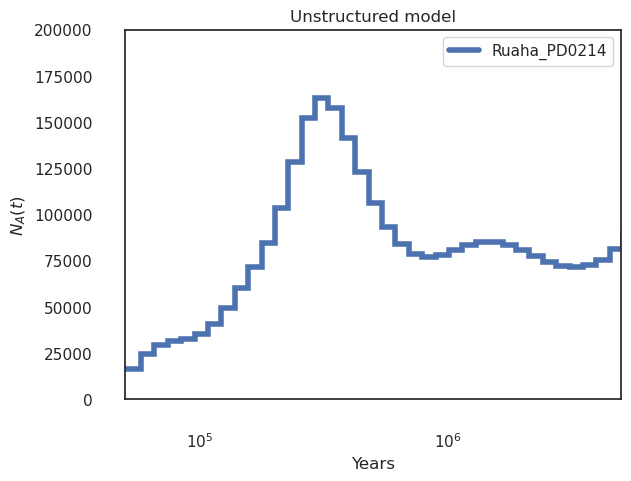

In [12]:
mu = 0.45e-08
gen = 11
final_params_file = "/home/eriks/primatediversity/people/erik/Diversity_Selection_Primates/steps/cobraa/PD_0214_D50_unstructured_final_parameters.txt"
final_params = np.loadtxt(final_params_file)
time_array = list(final_params[:,1])
time_array.insert(0,0)
time_array = np.array(time_array)
plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label="Ruaha_PD0214",linewidth=4,linestyle="solid",baseline=None)
plt.xlim(5e+04,5e+06)
plt.ylim(0,20e+04)
plt.xscale('log')
plt.ylabel('$N_A(t)$')
plt.xlabel('Years')
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
plt.legend(ncol=2)
plt.title('Unstructured model')
plt.show()

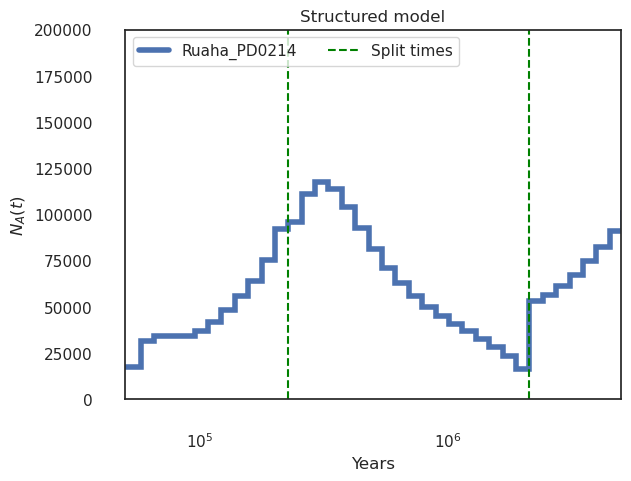

In [13]:
ts=12
te=30
final_params_file = "/home/eriks/primatediversity/people/erik/Diversity_Selection_Primates/steps/cobraa/PD_0214_D50_ts12_te30_final_parameters.txt"
final_params = np.loadtxt(final_params_file)
time_array = list(final_params[:,1])
time_array.insert(0,0)
time_array = np.array(time_array)
plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label="Ruaha_PD0214",linewidth=4,linestyle="solid",baseline=None) # plot population A inferred size
# plt.stairs(edges=(time_array[ts:te+1]/mu)*gen,values=(1/final_params[ts:te,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3) # plot population B inferred size 
plt.axvline((time_array[ts]/mu)*gen,color="green",linestyle="dashed")  
plt.axvline((time_array[te]/mu)*gen,label="Split times",color="green",linestyle="dashed")    

plt.xlim(5e+04,5e+06)
plt.ylim(0,20e+04)
plt.xscale('log')
plt.ylabel('$N_A(t)$')
plt.xlabel('Years')
plt.title('Structured model')
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
plt.legend(ncol=2)
plt.show()

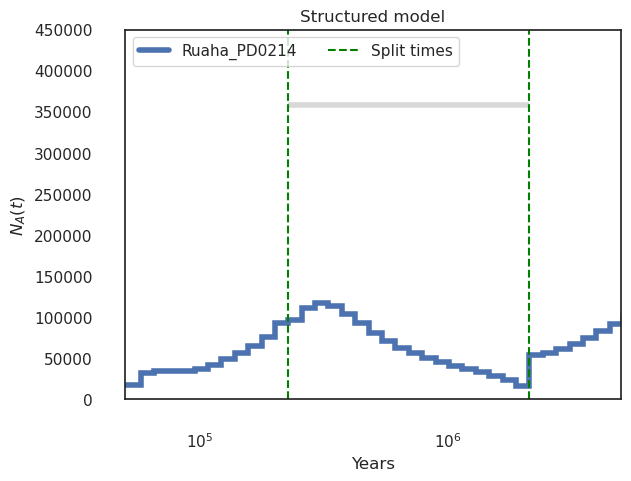

In [14]:
ts=12
te=30
final_params_file = "/home/eriks/primatediversity/people/erik/Diversity_Selection_Primates/steps/cobraa/PD_0214_D50_ts12_te30_final_parameters.txt"
final_params = np.loadtxt(final_params_file)
time_array = list(final_params[:,1])
time_array.insert(0,0)
time_array = np.array(time_array)
plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label="Ruaha_PD0214",linewidth=4,linestyle="solid",baseline=None) # plot population A inferred size
plt.stairs(edges=(time_array[ts:te+1]/mu)*gen,values=(1/final_params[ts:te,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3) # plot population B inferred size 
plt.axvline((time_array[ts]/mu)*gen,color="green",linestyle="dashed")  
plt.axvline((time_array[te]/mu)*gen,label="Split times",color="green",linestyle="dashed")    

plt.xlim(5e+04,5e+06)
plt.ylim(0,45e+04)
plt.xscale('log')
plt.ylabel('$N_A(t)$')
plt.xlabel('Years')
plt.title('Structured model')
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
plt.legend(ncol=2)
plt.show()

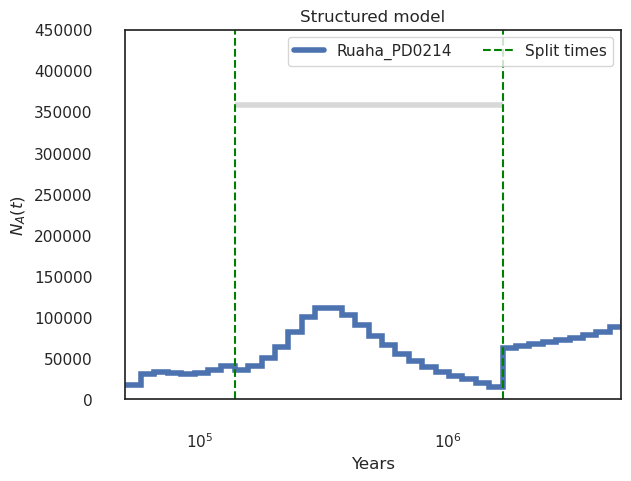

In [20]:
ts=8
te=28
final_params_file = "/home/eriks/primatediversity/people/erik/Diversity_Selection_Primates/steps/cobraa/PD_0214_D50_ts8_te28_final_parameters.txt"
final_params = np.loadtxt(final_params_file)
time_array = list(final_params[:,1])
time_array.insert(0,0)
time_array = np.array(time_array)
plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label="Ruaha_PD0214",linewidth=4,linestyle="solid",baseline=None) # plot population A inferred size
plt.stairs(edges=(time_array[ts:te+1]/mu)*gen,values=(1/final_params[ts:te,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3) # plot population B inferred size 
plt.axvline((time_array[ts]/mu)*gen,color="green",linestyle="dashed")  
plt.axvline((time_array[te]/mu)*gen,label="Split times",color="green",linestyle="dashed")    

plt.xlim(5e+04,5e+06)
plt.ylim(0,45e+04)
plt.xscale('log')
plt.ylabel('$N_A(t)$')
plt.xlabel('Years')
plt.title('Structured model')
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
plt.legend(ncol=2)
plt.show()